## Scripts for Spectral cube

The main aim of this chapter is to develop scripts that will:

* Extract sub-cubes that contains HI lines emission. 
* Apply a mask to the sub-cubes.
* Derive moment zero & moment one maps.
* Calculate HI mass of identified the sources
* Derive global profiles of the identified sources.

### Useful equations 

Moment zero maps :  $$M_0 = dv \sum F(v)$$

Moment one maps: $$M_1 = \frac{\sum v F(v)}{\sum  F(v)}$$

Moment two maps: $$M_2 = \sqrt{\frac{\sum \left( v - M_1 \right)^2 F(v)}{\sum  F(v)}}$$

HI mass: $$ \frac{M_{_{HI}}}{M_{_{\odot}}} = 0.236  \left( \frac{S_{_{int}}}{Jy \hspace{1mm} km \hspace{0.5mm}s^{-1}} \right) \left( \frac{d}{kpc}\right) $$

#### Where: $v$ is radial velocity,  $dv $ is a bin width,  $F(v)$ is flux as a funvction of radial velocity,  $S_{_{int}}$ is integrated flux and $d$ is the distance to the source.  These equations are taken from http://www.atnf.csiro.au/people/Tobias.Westmeier/tools_hihelpers.php

In [1]:
%pylab inline 
import matplotlib.pylab  as plt


Populating the interactive namespace from numpy and matplotlib


## Functions

Below "Mome0(A)" is a function that takes a "sub-cube" and mask out all voxels that are below some threshold (i.e. $4\sigma$). It then calculates moment zero map and finally, it returns the masked cube and the corresponding moment zero map.

In [2]:
#I need to write my own mask here and see if I get the same results
#err=cube.std().value


apl_plots is function that makes use of a python module known as SpectralCube (see https://github.com/radio-astro-tools/spectral-cube or Ginsburg, A., et al. 2015 ).  I use this module to derive both $M_0$ & $M_1$ and also plot them with aplpy.

In [14]:

def apl_plots(A):       #Define a function that will calculate moment maps and plot them.
    Cube = sp.SpectralCube.read(A)
    cube=Cube.with_spectral_unit(u.km / u.s)
    #cube=Cube
    name =raw_input('Apply mask:')
    if name =='yes':
        cube = Mask(cube)
    else: 
        cube = cube
        
    mom0 = cube.moment0()
    mom1 = cube.moment1()
    #print mom0.unit
    fig = plt.figure(figsize=(15, 7))
    fig.subplots_adjust(hspace=15)
    f1=aplpy.FITSFigure(mom0.hdu,figure=fig,subplot=[0.1,0.1,0.35,0.8])
    f1.show_colorscale(stretch='linear')
    f1.show_colorbar()
    f1.add_label(0.5, 1.05, 'Momont Zero Map.', relative=True, size='large', layer='title')
    f1.colorbar.set_axis_label_text('[ '+str(mom0.unit)+' ]')
    f1.colorbar.set_axis_label_font(size=12, weight='bold')
    
    f2=aplpy.FITSFigure(mom1.hdu,figure=fig,subplot=[0.55,0.1,0.35,0.8])
    f2.show_colorscale(stretch='linear')
    f2.add_label(0.5, 1.05, 'Momont One Map', relative=True, size='large', layer='title')
    f2.show_colorbar()
    f2.colorbar.set_axis_label_text('[ '+str(mom1.unit)+' ]')
    f2.colorbar.set_axis_label_font(size=12, weight='bold')
    f2.hide_yaxis_label()
    f2.hide_ytick_labels()
    

In [15]:
apl_plots('../Data/Artificial/ATC2/Test.fits')


AttributeError: 'module' object has no attribute 'SpectralCube'

Mask is the function that applies a mask to the sub-cube

In [6]:
def Mask(cube):
    mask1 = cube > 4.*cube.std()      # Create a mask that has values greater than 4-sigma threshold.
    cube2 = cube.with_mask(mask1)     # Mask the cube out.
    return cube2


mom_plot(A) is a function that simple plots one of the moment maps.

In [7]:
def mom_plot(A):
    m = aplpy.FITSFigure(A)
    m.show_colorscale(stretch='linear')
    m.show_colorbar()
    m.colorbar.set_axis_label_text('[ Jy km/s ]')
    m.colorbar.set_axis_label_font(size=12, weight='bold')


## Plots

In figure 1, I will present the moment zero map that I've derived.   Figure 2 shows 

INFO: Auto-setting vmin to -7.130e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.914e-01 [aplpy.core]


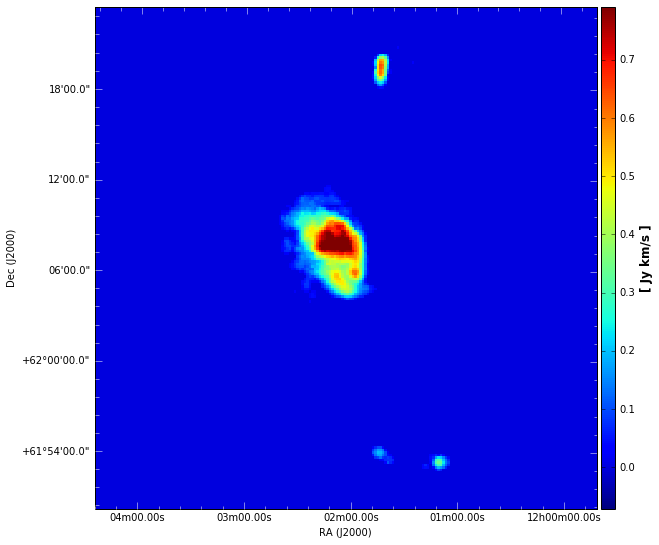

In [14]:
mom_plot('mom0.fits')

####   Figure 1: Shows moment zero map that I've derived using a $4 \sigma$ threshold.

/usr/local/lib/python2.7/dist-packages/spectral_cube/spectral_cube.py:237: UserWarning: radio_beam is not installed. No beam can be created.
  warnings.warn("radio_beam is not installed. No beam "
/usr/local/lib/python2.7/dist-packages/spectral_cube/spectral_cube.py:245: UserWarning: Could not parse beam information from header.  Exception was: UnboundLocalError("local variable 'Beam' referenced before assignment",)
  "  Exception was: {0}".format(ex.__repr__()))


Apply mask:no


/usr/local/lib/python2.7/dist-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))


INFO: Auto-setting vmin to -7.120e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.904e-01 [aplpy.core]
INFO: Auto-setting vmin to  9.803e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.670e+03 [aplpy.core]


/usr/local/lib/python2.7/dist-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


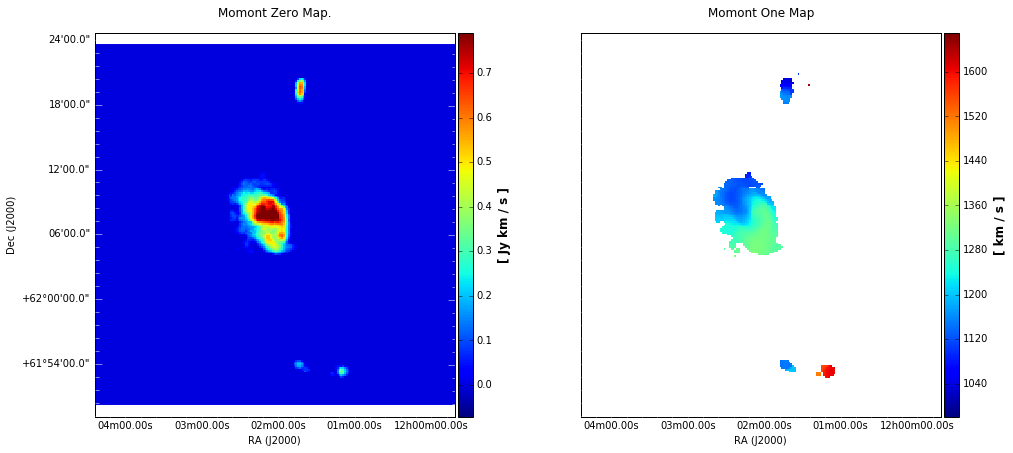

In [7]:
#mom,cub = Mome0('sofiatestcube.fits')
apl_plots('cube1.fits')

####   Figure 2: Shows $M_0$ and $M_1$ maps of the masked cube that I've derived using the function "Mome0(A)".    Note: I derived these maps using SpectralCube module.

Apply mask:no
INFO: Auto-setting vmin to -4.264e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.351e-01 [aplpy.core]
INFO: Auto-setting vmin to -2.142e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.629e+04 [aplpy.core]


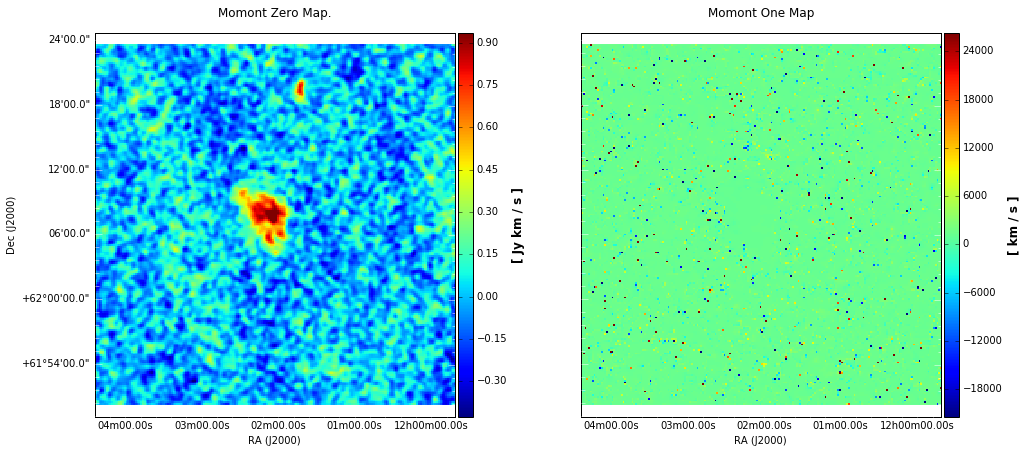

In [8]:
apl_plots('sofiatestcube.fits')

####   Figure 3: Shows $M_0$ and $M_1$ maps from a that was masked  with SpectralCube module.

Apply mask:yes
INFO: Auto-setting vmin to -6.867e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.001e+00 [aplpy.core]
INFO: Auto-setting vmin to  9.803e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.670e+03 [aplpy.core]


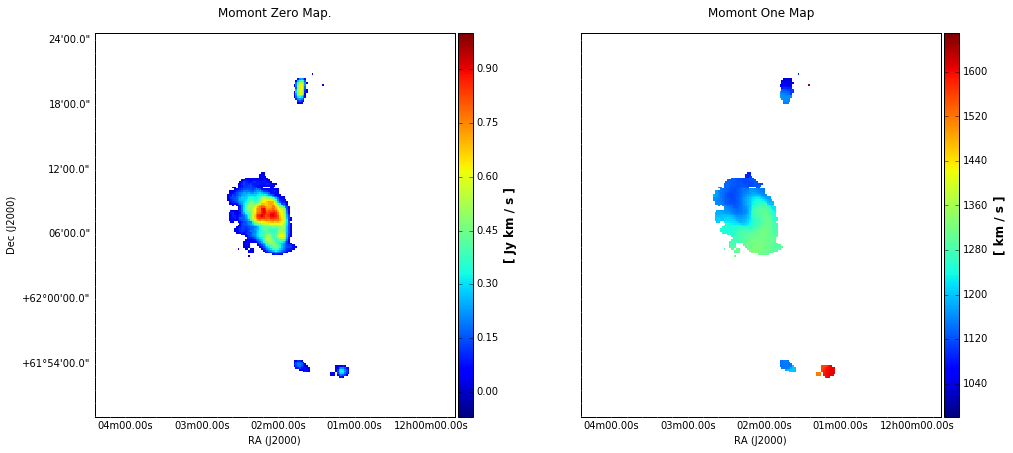

In [9]:
apl_plots('sofiatestcube.fits')

####   Figure 3: Shows $M_0$ and $M_1$ maps from an un-masked  data cube.

INFO: Auto-setting vmin to -7.935e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.808e-01 [aplpy.core]


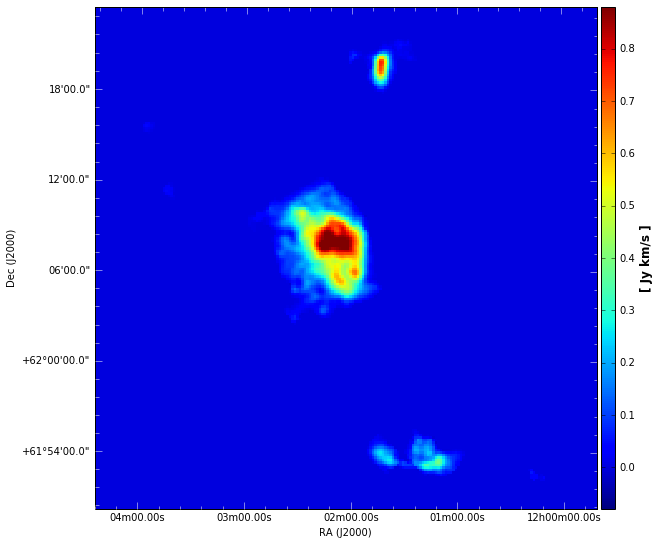

In [10]:
mom_plot('../SoFia_tuts/tut_1/sofiatestcube_mom0.fits')

####   Figure 4: Shows $M_0$ map from SoFiA.

INFO: Auto-setting vmin to  8.967e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.785e+03 [aplpy.core]


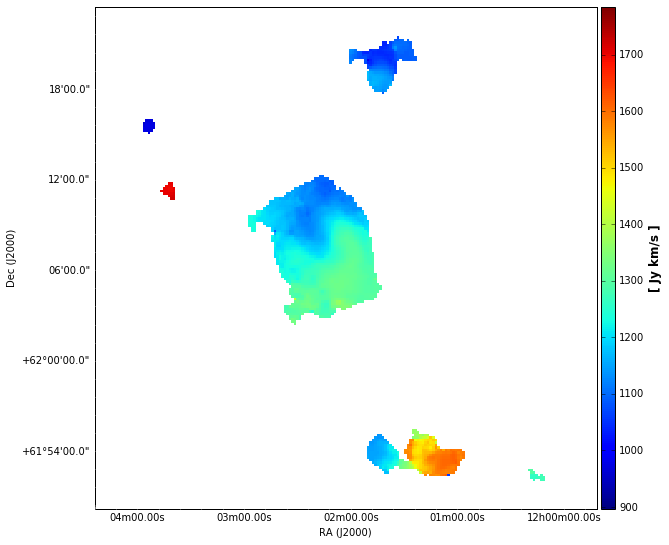

In [11]:
mom_plot('../SoFia_tuts/tut_1/sofiatestcube_mom1.fits')

####   Figure 5: Shows $M_1$ map from SoFiA.

INFO: Auto-setting vmin to -5.627e-02 [aplpy.core]
INFO: Auto-setting vmax to  6.609e-02 [aplpy.core]


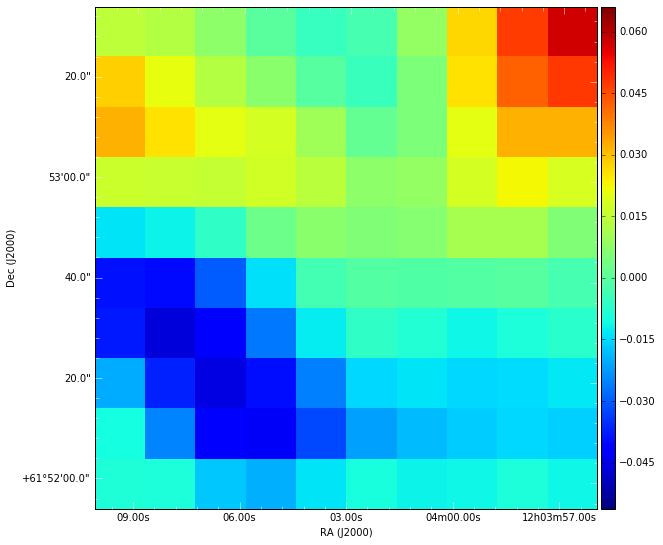

In [88]:
aa = SpectralCube.read('sofiatestcube.fits')
aa=aa.with_spectral_unit(u.km / u.s)
V=aa.spectral_axis.to(u.km/u.s)
std = aa.std().to(u.mJy)
sub = aa.subcube(xlo=10, xhi=20, ylo=10, yhi=20, zlo=10, zhi=20, rest_value=None)
mom11 = sub.moment0()

f1=aplpy.FITSFigure(mom11.hdu)
f1.show_colorscale(stretch='linear')
f1.show_colorbar()
SpectralCube.write(sub, 'cublet.fits', overwrite=True, format=None)


In [85]:
xx,yy,zz=aa.shape
print xx,yy,zz    

100 200 200


In [58]:
a,b = (V.value).min(),(V.value).max()
dx  = (b-a)/40.
v   = np.linspace(a,b,dx)

INFO: Auto-setting vmin to  8.967e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.785e+03 [aplpy.core]


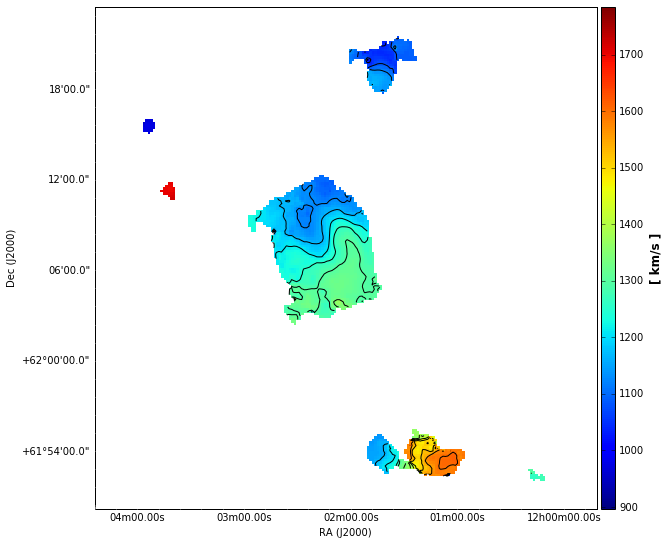

In [59]:

fig = aplpy.FITSFigure('../SoFia_tuts/tut_1/sofiatestcube_mom1.fits')
fig.show_colorscale(stretch='linear')
fig.show_contour(levels=v,colors='black')
fig.show_colorbar()
fig.colorbar.set_axis_label_text('[ km/s ]')
fig.colorbar.set_axis_label_font(size=12, weight='bold')


## Catalogue


Data: Coordinates of the sources
      
      No.1 (x,y,z) = (13, 179, 144)
      No.2 (x,y,z) = (28, 22, 112)
      No.3 (x,y,z) = (30, 107, 90.)